# Model simulation and sanity check

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import seaborn as sns
sns.set_theme(style="darkgrid")


In [2]:
from agent import run_experiment, Bandit, Agent
bandit = Bandit()

# Rescorla Wagner

Running a go-nogo experiment simulation with params = {'alpha': 0.2, 'beta': 5, 'noise': 0, 'bias': 0, 'Pav': 0}


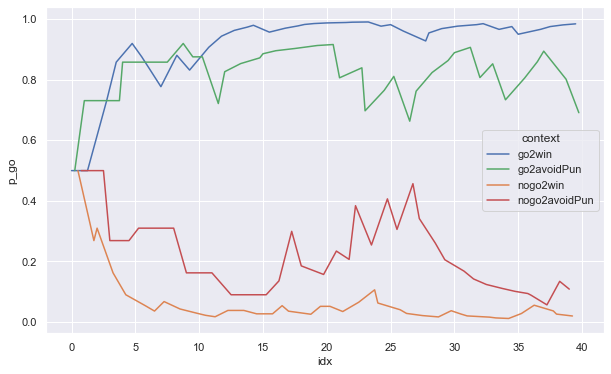

In [4]:
df = run_experiment(bandit, n_runs=40, params={'alpha': 0.2, 'beta': 5, 'noise': 0, 'bias': 0, 'Pav': 0})
df['idx'] = df.index / 4
palette ={"go2win": "C0", "nogo2win": "C1", "go2avoidPun": "C2", "nogo2avoidPun": "C3"}
plt.figure(figsize=(10,6))
ax = sns.lineplot(x="idx", y="p_go",
             hue="context", 
             data=df, palette=palette)

df.rename(columns={'context': 'stimulus'}, inplace=True)

In [5]:
from fitting import ML

max_likelihood = ML(df, optimization_method='L-BFGS-B', model_type='RW')

max_likelihood.fit_model()

      fun: 54.81416733924523
 hess_inv: <2x2 LbfgsInvHessProduct with dtype=float64>
      jac: array([-3.01270120e-04, -6.03961329e-05])
  message: 'CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH'
     nfev: 39
      nit: 9
     njev: 13
   status: 0
  success: True
        x: array([0.23773591, 4.63332618])

# Rescorla Wegner + Noise

Running a go-nogo experiment simulation with params = {'alpha': 0.2, 'beta': 3, 'noise': 0.1, 'bias': 0, 'Pav': 0}


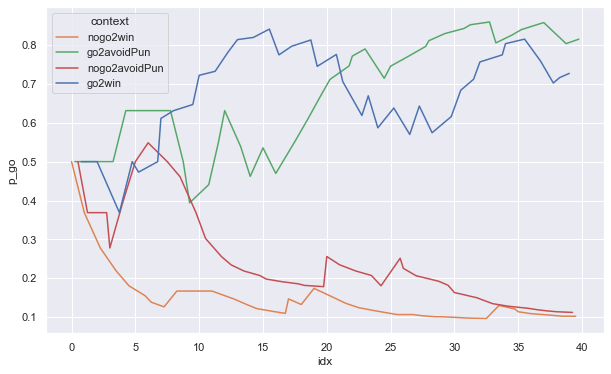

In [5]:
df = run_experiment(bandit, n_runs=40, params={'alpha': 0.2, 'beta': 3, 'noise': 0.1, 'bias': 0, 'Pav': 0})
df['idx'] = df.index / 4
palette ={"go2win": "C0", "nogo2win": "C1", "go2avoidPun": "C2", "nogo2avoidPun": "C3"}
plt.figure(figsize=(10,6))
ax = sns.lineplot(x="idx", y="p_go",
             hue="context", 
             data=df, palette=palette)

df.rename(columns={'context': 'stimulus'}, inplace=True)


In [6]:
from fitting import ML

max_likelihood = ML(df, optimization_method='L-BFGS-B', model_type='RW+noise')

max_likelihood.fit_model()

      fun: 90.3034071925541
 hess_inv: <3x3 LbfgsInvHessProduct with dtype=float64>
      jac: array([-1.71518337, -0.03208811,  0.80615763])
  message: 'CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH'
     nfev: 64
      nit: 9
     njev: 16
   status: 0
  success: True
        x: array([0.20661031, 2.10826707, 0.00490336])

# Rescorla Wegner + Noise + Go Bias

Running a go-nogo experiment simulation with params = {'alpha': 0.2, 'beta': 5, 'noise': 0.2, 'bias': 2, 'Pav': 0}


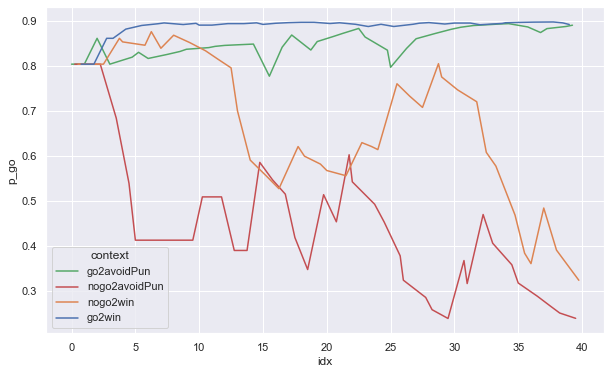

In [11]:
df = run_experiment(bandit, n_runs=40, params={'alpha': 0.2, 'beta': 5, 'noise': 0.2, 'bias': 2, 'Pav': 0})
df['idx'] = df.index / 4
palette ={"go2win": "C0", "nogo2win": "C1", "go2avoidPun": "C2", "nogo2avoidPun": "C3"}
plt.figure(figsize=(10,6))
ax = sns.lineplot(x="idx", y="p_go",
             hue="context", 
             data=df, palette=palette)

df.rename(columns={'context': 'stimulus'}, inplace=True)

In [12]:
from fitting import ML

max_likelihood = ML(df, optimization_method='L-BFGS-B', model_type='RW+noise+bias')

max_likelihood.fit_model()

      fun: 77.04961933375782
 hess_inv: <4x4 LbfgsInvHessProduct with dtype=float64>
      jac: array([ 1.63602749e+00, -1.55466752e-03,  6.72423397e+00, -8.13520278e-01])
  message: 'ABNORMAL_TERMINATION_IN_LNSRCH'
     nfev: 420
      nit: 14
     njev: 84
   status: 2
  success: False
        x: array([0.27965628, 7.13858202, 0.28436995, 2.99998048])

# Rescorla Wegner + Noise + Go Bias + Pavlovian Bias

Running a go-nogo experiment simulation with params = {'alpha': 0.2, 'beta': 5, 'noise': 0.2, 'bias': 0.5, 'Pav': 1.5}


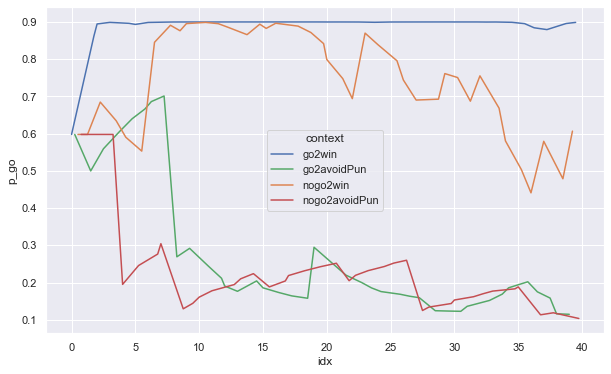

In [15]:
df = run_experiment(bandit, n_runs=40, params={'alpha': 0.2, 'beta': 5, 'noise': 0.2, 'bias': 0.5, 'Pav': 1.5})
df['idx'] = df.index / 4
palette ={"go2win": "C0", "nogo2win": "C1", "go2avoidPun": "C2", "nogo2avoidPun": "C3"}
plt.figure(figsize=(10,6))
ax = sns.lineplot(x="idx", y="p_go",
             hue="context", 
             data=df, palette=palette)

df.rename(columns={'context': 'stimulus'}, inplace=True)

In [17]:
from fitting import ML

max_likelihood = ML(df, optimization_method='L-BFGS-B', model_type='RW+noise+bias+Pav')

max_likelihood.fit_model()

      fun: 63.829729219576
 hess_inv: <5x5 LbfgsInvHessProduct with dtype=float64>
      jac: array([ 4.54747351e-05, -2.13162803e-06, -6.39488463e-05,  1.63424830e-05,
        7.10542740e-06])
  message: 'CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH'
     nfev: 186
      nit: 23
     njev: 31
   status: 0
  success: True
        x: array([0.28251918, 9.5869725 , 0.21849406, 1.94393548, 1.7250042 ])